Python for Data Analysis
----

# Book
- CN: 利用Python进行数据分析 78.4MB.pdf
- EN: Python for Data Analysis 2nd Edition.pdf

![cover](images/cover1.png)


# 概述
原书英文版，2013年由OReilly出版，中文版由机械工业出版社出版。

全书12个章节：
- 准备工作
- 引言
- IPython
- Number基础
- pandas入门
- 数据加载、存储与文件格式
- 数据规整化
- 绘图和可视化
- 数据聚合与分组运算
- 时间序列
- 金融和经济数据
- NumPy高级应用
- 附录
 - Python语言精要


# 源代码

 `git clone https://github.com/pydata/pydata-book -b 1st-edition`

# 读书笔记
## Ch01 准备工作
本章节如题，即为学习如何来用Python来分析数据的准备工作。
- what： 处理对象是什么？ 主要是结构化数据表格
- How： 工具是什么？ Python， NumPy/Matplotlib/IPython/pandas/SciPy
- Why： Python简单易用，有强大的公共库资源
- Setup: 准备代码调试编写环境 

## Ch02 引言
### XXX 数据集

In [ ]:
#### Load JSON
import json
path = '/opt/Work/ML/pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]
records[0]

In [ ]:
type(records[0])

#time_zones = [rec['tz'] for rec in records]
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:5]

In [ ]:
def get_counts(sequence):
    counts = {} # dict
    for x in sequence:
        if x in counts.keys():
            counts[x] += 1
        else:
            counts[x] = 1
    return counts
            
get_counts(time_zones)

In [ ]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

get_counts2(time_zones)

In [ ]:
counts = get_counts2(time_zones)

In [ ]:
type(counts) #collections.defaultdict
type(counts.items()) # dict_items

In [ ]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]
counts = get_counts2(time_zones)
top_counts(counts)

In [ ]:
import pandas as pd; import numpy as np
from pandas import DataFrame, Series
frame = DataFrame(records)

In [ ]:
tz_counts = frame['tz'].value_counts()

In [ ]:
clean_tz = frame['tz'].fillna('Missing')

In [ ]:
type(clean_tz)

In [ ]:
# NB!!!
clean_tz[clean_tz==''] = 'Unknow'

In [ ]:
tz_counts = clean_tz.value_counts()
tz_counts[:10]

In [ ]:
frame['a'].head()
frame.a.head()

In [ ]:
results = Series(x.split()[0] for x in frame.a.dropna())
print(results.head(5))
print( results.value_counts()[:8] )

In [ ]:
# ?????
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'),
                            'Windows', 'Not Windows')

In [ ]:
print( operating_system[:5])

In [ ]:
by_tz_os = cframe.groupby(['tz', operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

In [ ]:
# 用于按照升序排列
indexer = agg_counts.sum(1).argsort()
indexer[:10]

In [71]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


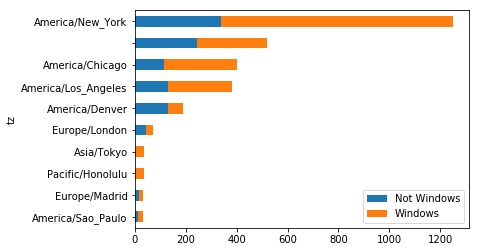

In [76]:
count_subset.plot(kind='barh', stacked=True)

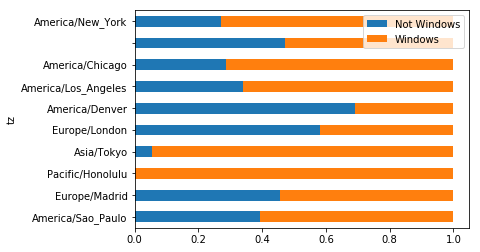

In [75]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh',stacked=True)

### MovieLens 1M数据集


In [80]:
import pandas as pd
unames = ['user_id','gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies=pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by s

In [84]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [85]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [86]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [87]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
